In [24]:
import numpy as np
import mltools as ml
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
plt.style.use('/Users/brookeryan/Developer/CS273A Homework/seawitch.mplstyle')

# CS 273A Homework 4
## Machine Learning, Winter 2021
### Brooke Ryan

In [25]:
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X, Y = ml.shuffleData(X, Y)

# Problem 1
## Setting up the data and Linear Classifier

### 1. Print the minimum, maximum, mean, and the variance of all the features.

In [26]:
print('--------------------------')
print('          X               ')
print('--------------------------')
print('Min:', np.min(X, axis=0))
print('Max:', np.max(X, axis=0))
print('Mean:', np.mean(X, axis=0))
print('Var:', np.var(X,axis=0))

--------------------------
          X               
--------------------------
Min: [ 1.9350e+02  1.5250e+02  2.1425e+02  1.5250e+02  1.0000e+01  0.0000e+00
  0.0000e+00  0.0000e+00  8.7589e-01  0.0000e+00  0.0000e+00  0.0000e+00
  9.9049e-01 -9.9990e+02]
Max: [2.5300e+02 2.4900e+02 2.5250e+02 2.5250e+02 3.1048e+04 1.3630e+04
 9.2380e+03 1.2517e+02 1.9167e+01 1.3230e+01 6.6761e+01 7.3902e+01
 9.7504e+02 7.9720e+02]
Mean: [2.41601104e+02 2.27376571e+02 2.41554150e+02 2.32826768e+02
 3.08992337e+03 9.28259020e+02 1.38093830e+02 3.24857933e+00
 6.49865290e+00 2.09713912e+00 4.21766041e+00 2.69171845e+00
 1.02715905e+01 5.78148050e+00]
Var: [8.34991711e+01 9.26255931e+01 3.52863398e+01 9.76257317e+01
 1.56515138e+07 3.08176182e+06 4.43951746e+05 8.21948502e+00
 6.40504819e+00 4.36344047e+00 4.08637188e+00 2.19877847e+00
 4.04646245e+02 3.40652055e+03]


### 2. Split the dataset, and rescale each into training and validation.  Print the min, max, mean, and variance of the rescaled features.

In [27]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
XtS, params = ml.rescale(Xt)
XvS, _ = ml.rescale(Xva, params)

print('--------------------------')
print('          XtS             ')
print('--------------------------')
print('Min:', np.min(XtS, axis=0))
print('Max:', np.max(XtS, axis=0))
print('Mean:', np.mean(XtS, axis=0))
print('Var:', np.var(XtS,axis=0))

print('--------------------------')
print('          XvS             ')
print('--------------------------')
print('Min:', np.min(XvS, axis=0))
print('Max:', np.max(XvS, axis=0))
print('Mean:', np.mean(XvS, axis=0))
print('Var:', np.var(XvS,axis=0))

--------------------------
          XtS             
--------------------------
Min: [ -4.95461163  -3.77377426  -4.32020667  -2.72309574  -0.80079029
  -0.53013724  -0.21359787  -1.13208597  -1.86949978  -0.99881312
  -2.04150726  -1.76459435  -0.56616293 -17.83750767]
Max: [ 1.25802831  1.82829827  1.7623924   1.89756632  7.35822512  7.27787363
 12.20948006  7.66054885  4.44531405  4.27556024  8.51935491 28.50291881
 29.21021596 13.9093136 ]
Mean: [-1.49759316e-14  1.24051880e-15 -5.27949240e-14 -1.72764025e-14
 -3.14193116e-17 -2.56850097e-17 -3.99831557e-16  1.16933130e-15
 -2.27000641e-15  1.88613569e-15 -3.31152883e-15  2.25992558e-15
 -6.67177424e-16  2.60541588e-17]
Var: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
--------------------------
          XvS             
--------------------------
Min: [ -4.84749715  -3.77377426  -4.47140881  -2.82287251  -0.80210486
  -0.53013724  -0.21359787  -1.13208597  -2.18042818  -0.99881312
  -2.04150726  -1.76459435  -0.56755109 -17.83750

### 3. Vary the amount of regularization, `reg`, in a wide enough range and plot the training and validation AUC as the regularization weight is varied.  Show the plot.

/Users/brookeryan/Developer/CS273A Homework/Homework4/mltools/linearC.py:122: RuntimeWarning: overflow encountered in exp
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
/Users/brookeryan/Developer/CS273A Homework/Homework4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


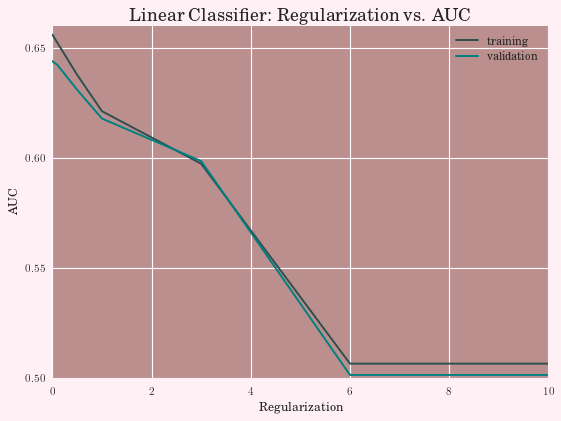

In [28]:
reg = [0.0, 0.1, 0.5, 1.0, 3.0, 6.0, 8.0, 10.0]

tr_auc = np.zeros(len(reg))
va_auc = np.zeros(len(reg))

for i,r in enumerate(reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100)
    tr_auc[i] = learner.auc(XtS, Yt) # train AUC
    va_auc[i] = learner.auc(XvS, Yva)

plt.plot(reg, tr_auc, label='training')
plt.plot(reg, va_auc, label='validation')
plt.xlabel("Regularization")
plt.ylabel("AUC")
plt.title("Linear Classifier: Regularization vs. AUC")
plt.legend()
plt.show()

### 4. Add $degree$ $2$ polynomial features, print out the number of features, and explain why it is what it is.

In [29]:
# Add degree 2 polynomial features
XtP = ml.transforms.fpoly(Xt, 2, bias=False)
XtP, params = ml.transforms.rescale(XtP)
XvP = ml.transforms.rescale(ml.transforms.fpoly(Xva,2, bias=False), params)[0]

print("Number of Features (Xt):",Xt.shape[1])
print("Number of Features (XtP):",XtP.shape[1])

Number of Features (Xt): 14
Number of Features (XtP): 119


When our classifier is linear, the number of features is equal to 14.

As we can see from the transformation, the number of features has increased to 119 for a polynomial classifier.

This is because there will be 14 quadratic terms of features.

$C_{14}^2=\frac{14*13}{2}$ terms of cross product of any two features add to the original 14 features.

As a result, $14+14+(14*13)/2 = 119$, which is mathematically how we arrive at 119 features.

### 5. Reuse your code that varied regularization to compute the training and validation performance (AUC) for this transformed data.  Show the plot.

/Users/brookeryan/Developer/CS273A Homework/Homework4/mltools/base.py:97: RuntimeWarning: divide by zero encountered in log
  return - np.mean( np.log( P[ np.arange(M), Y ] ) ) # evaluate
/Users/brookeryan/Developer/CS273A Homework/Homework4/mltools/linearC.py:134: RuntimeWarning: invalid value encountered in double_scalars
  done = (it > stopIter) or ( (it>1) and (abs(Jsur[-1]-Jsur[-2])<stopTol) )
/Users/brookeryan/Developer/CS273A Homework/Homework4/mltools/linearC.py:122: RuntimeWarning: overflow encountered in exp
  sigx  = np.exp(respi) / (1.0+np.exp(respi))
/Users/brookeryan/Developer/CS273A Homework/Homework4/mltools/linearC.py:122: RuntimeWarning: invalid value encountered in true_divide
  sigx  = np.exp(respi) / (1.0+np.exp(respi))


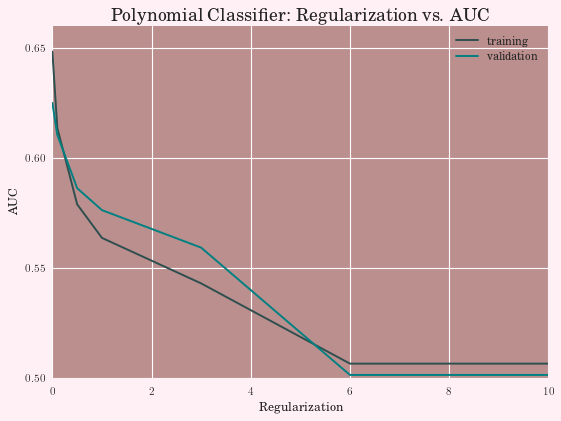

In [30]:
# Reset tr and va AUC values
tr_auc = np.zeros(len(reg))
va_auc = np.zeros(len(reg))

for i,r in enumerate(reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtP, Yt, reg=r, initStep=0.5, stopTol=1e-6, stopIter=100)
    tr_auc[i] = learner.auc(XtP, Yt) # train AUC
    va_auc[i] = learner.auc(XvP, Yva)

plt.plot(reg, tr_auc, label='training')
plt.plot(reg, va_auc, label='validation')
plt.xlabel("Regularization")
plt.ylabel("AUC")
plt.title("Polynomial Classifier: Regularization vs. AUC")
plt.legend()
plt.show()

# Problem 2
## Nearest Neighbors

In [31]:
learner = ml.knn.knnClassify()
learner.train(XtS, Yt, K=1, alpha=0.0)
learner.auc(XtS, Yt)

0.9974687652518592

### 1. Plot of the training and validation performance for an appropriately wide range of K, with $\alpha = 0$.

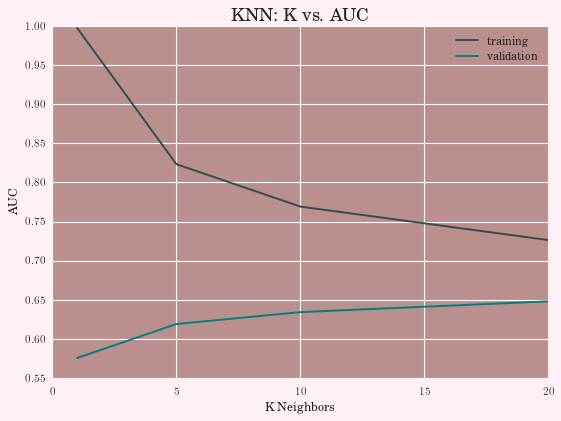

In [32]:
K = [1,5,10,20]
tr_auc = np.zeros(len(K))
va_auc = np.zeros(len(K))
learner = ml.knn.knnClassify()

for i,k in enumerate(K):
    learner.train(XtS, Yt, K=k, alpha=0.0)
    tr_auc[i] = learner.auc(XtS, Yt)
    va_auc[i] = learner.auc(XvS, Yva)

plt.plot(K, tr_auc, label='training')
plt.plot(K, va_auc, label='validation')
plt.xlabel("K Neighbors")
plt.ylabel("AUC")
plt.title("KNN: K vs. AUC")
plt.legend()
plt.show()

### 2. Do the same with unscaled/ original data, and show the plots.

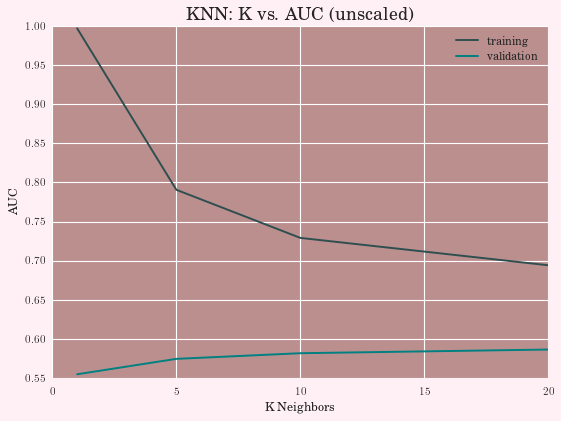

In [33]:
tr_auc = np.zeros(len(K))
va_auc = np.zeros(len(K))

for i,k in enumerate(K):
    learner.train(Xt, Yt, K=k, alpha=0.0)
    tr_auc[i] = learner.auc(Xt, Yt)
    va_auc[i] = learner.auc(Xva, Yva)

plt.plot(K, tr_auc, label='training')
plt.plot(K, va_auc, label='validation')
plt.xlabel("K Neighbors")
plt.ylabel("AUC")
plt.title("KNN: K vs. AUC (unscaled)")
plt.legend()
plt.show()

### 3. For a range of both $K$ and $\alpha$, compute the training and validation AUC and plot them in a two-dimensional plot.  Show both plots, and reccommend a choice of $K$ and $\alpha$ based on those results.

In both examples, the general trend of the data seems to be very similar.

The kNN algorithm relies on majority voting, typically with Euclidean distance, which also appears to be the implementation used in the `mltools` library.

Non-normalized data can result in a skewed graph representation of the data, and cause the kNN classifier to completely ignore features that are indeed relevant to the model.

The implementation for normalization in the `mltools` library shifts and scales data to be zero mean, unit variance in each dimension.  The effect this would have on our cats vs. dogs dataset should result in a graphical representation in which all features are considered equally.

Without knowing more about the application or goal beyond binary classification with this dataset, I would probably recommend a *scaled* representation of the data.  However the great thing with *machine* learning is that its really not a big deal to run some tests on both, so I'd feel unburdened to switch to an unscaled representation if we were seeing better results for the particular context, which is important to consider as well.

In [37]:
K = [1,2,3,5,10]
A = range(0,4,1)
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))

for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner.train(XtS, Yt, K=k, alpha=a)
        tr_auc[i][j] = learner.auc(XtS, Yt)
        va_auc[i][j] = learner.auc(XvS, Yva)


/Users/brookeryan/Developer/CS273A Homework/Homework4/mltools/knn.py:103: RuntimeWarning: invalid value encountered in true_divide
  prob[i,:] = count / count.sum()    # save (soft) results


KeyboardInterrupt: 

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(A))
ax.set_yticklabels(['']+list(K))
ax.set_xlabel("A")
ax.set_ylabel("K")
ax.set_title("KNN Training AUC (unscaled)")
plt.show()

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+list(A))
ax.set_yticklabels(['']+list(K))
ax.set_xlabel("A")
ax.set_ylabel("K")
ax.set_title("KNN validation AUC (unscaled)")
plt.show()

To be honest, I was not able to generate a graph for this.  I believe this is due to the fact that I tried to do this homework on my local machine, and it does not have enough computational power to generate these graphs.  I waited for 30 minutes.

However, based on a theoretical examination of the concepts from class as well as from the sources listed in the Sources Acknowledgement section, I recommend $K = 10$ and $a = 0$.

A higher $K$ tends towards majority voting, and is less biased and localized compared to smaller values of $K$.

# Problem 3
## Decision trees

In [39]:
learner = ml.dtree.treeClassify(Xt, Yt, maxDepth=15)

### 1. Keeping `minParent=2` and `minLeaf=1`, vary `maxDepth` to a range of your choosing, and plot the training and validation AUC.

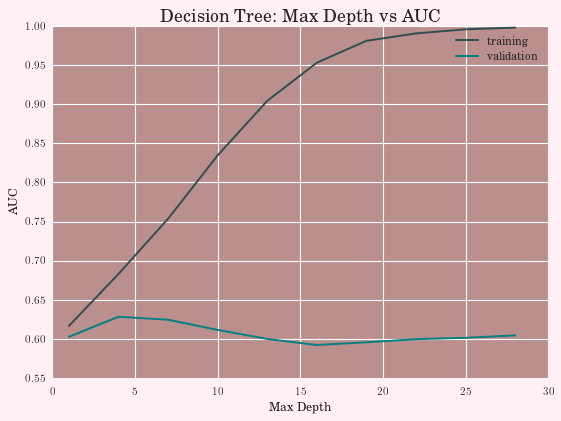

In [40]:
max_depth = range(1,30,3)
tr_auc = np.zeros(len(max_depth))
va_auc = np.zeros(len(max_depth))

# Question 4.2
sz1 = np.zeros(len(max_depth))
sz2 = np.zeros(len(max_depth))

learner = ml.dtree.treeClassify()

for i,d in enumerate(max_depth):
    learner.train(Xt, Yt, maxDepth=d, minParent=2, minLeaf=1)
    tr_auc[i] = learner.auc(Xt, Yt)
    va_auc[i] = learner.auc(Xva, Yva)
    sz1[i] = learner.sz

    learner.train(Xt, Yt, maxDepth=d, minParent=4, minLeaf=1)
    sz2[i] = learner.sz

plt.plot(max_depth, tr_auc, label='training')
plt.plot(max_depth, va_auc, label='validation')
plt.xlabel("Max Depth")
plt.ylabel("AUC")
plt.title("Decision Tree: Max Depth vs AUC")
plt.legend()
plt.show()

### 2. Plot the number of nodes in the tree as `maxDepth` is varied.  Plot another line in this plot by increasing either `minParent` or `minLeaf`.

In the code above, `sz1` represents the line where `minParent=2`, and `sz2` represents the line where `minParent` is increased to 4 for this test.

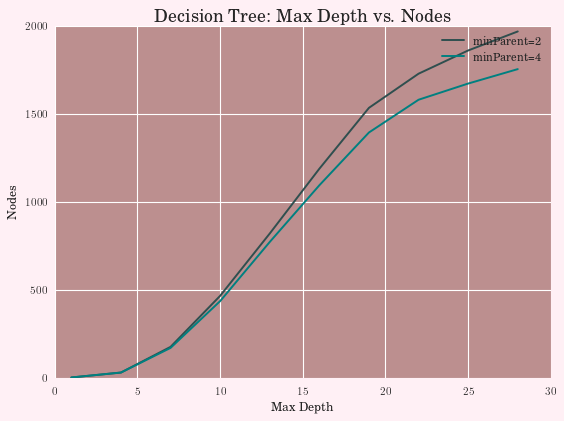

In [41]:
plt.plot(max_depth, sz1, label='minParent=2')
plt.plot(max_depth, sz2, label='minParent=4')
plt.xlabel("Max Depth")
plt.ylabel("Nodes")
plt.title("Decision Tree: Max Depth vs. Nodes")
plt.legend()
plt.show()

### 3. Set `maxDepth` to a fixed value, and plot the training and validation performance of the other two hyperparameters in an appropriate range, using the same 2D plot for nearest-neighbors.  Show the plots, and reccommend a choice for `minParent` and `minLeaf` based on these results.

In [43]:
# Set maxDepth = 15
mPar = range(2,9,1)
mLea = range(1,11,2)
tr_auc = np.zeros((len(mPar),len(mLea)))
va_auc = np.zeros((len(mPar),len(mLea)))
for i,p in enumerate(mPar):
    for j,l in enumerate(mLea):
        learner.train(Xt, Yt, maxDepth=15, \
                      minParent=p, minLeaf=l)
        tr_auc[i][j] = learner.auc(Xt, Yt)
        va_auc[i][j] = learner.auc(Xva, Yva)

### Training

<ipython-input-60-88f05062f184>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(mLea))
<ipython-input-60-88f05062f184>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(mPar))


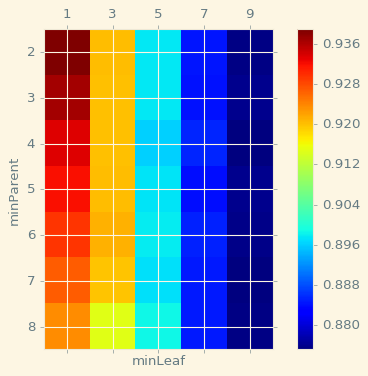

In [60]:
plt.style.use('Solarize_Light2')    #this style works better for heat map graphs

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(mLea))
ax.set_yticklabels(['']+list(mPar))
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
plt.show()

### Validation

<ipython-input-61-8bd62ded197a>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(mLea))
<ipython-input-61-8bd62ded197a>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(mPar))


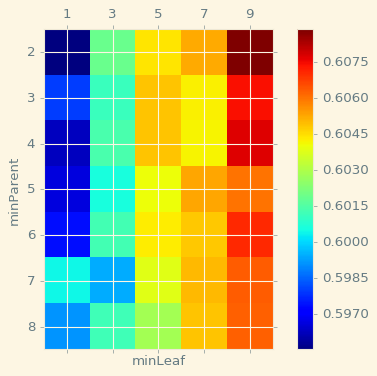

In [61]:
plt.style.use('Solarize_Light2')    #this style works better for heat map graphs

f, ax = plt.subplots(1, 1, figsize=(8, 5))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+list(mLea))
ax.set_yticklabels(['']+list(mPar))
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
plt.show()

As we can see from the graphs, AUC validation is the highest when minParent is equal to 8, and minLeaf is equal to 9.

Therefore based on this test and trying to maximize AUC on validation, I would recommend those parameters be used.

# Problem 4
## Neural Networks and Conclusion

### 1. Vary the number of hidden layers and the nodes in each layer (we will assume each layer has the same number of nodes), and compute the training and validation performance. Show 2D plots, like for decision trees and K-NN classifiers, and recommend a network size based on the above.

In [63]:
nlayers = range(1,4,1)
nnodes = range(2,32,2)

tr_auc = np.zeros((len(nlayers),len(nnodes)))
va_auc = np.zeros((len(nlayers),len(nnodes)))

for i, layer in enumerate(nlayers):
    for j, node in enumerate(nnodes):
        nn = ml.nnet.nnetClassify()
        size = [XtS.shape[1]] + [node]*layer + [2]
        nn.init_weights(size, 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepConstant=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt)
        va_auc[i][j] = nn.auc(XvS, Yva)

it 2 : Jsur = 0.49854766711828286, J01 = 0.3468
it 4 : Jsur = 0.4982167055539039, J01 = 0.3468
it 8 : Jsur = 0.49789980787457533, J01 = 0.3468
it 16 : Jsur = 0.49759095769171197, J01 = 0.3468
it 32 : Jsur = 0.49754332038625787, J01 = 0.3468
it 64 : Jsur = 0.49741118681428886, J01 = 0.3468
it 128 : Jsur = 0.4973620388157623, J01 = 0.3468
it 256 : Jsur = 0.4972514721565907, J01 = 0.3468
it 512 : Jsur = 0.4971671575584511, J01 = 0.3468
it 2 : Jsur = 0.4975441963324283, J01 = 0.3468
it 4 : Jsur = 0.49721803061803294, J01 = 0.3468
it 8 : Jsur = 0.49719181641038357, J01 = 0.3468
it 16 : Jsur = 0.4969571260239447, J01 = 0.3468
it 32 : Jsur = 0.49703111458911553, J01 = 0.3468
it 64 : Jsur = 0.4970084164855507, J01 = 0.3468
it 128 : Jsur = 0.49684242549098306, J01 = 0.3468
it 256 : Jsur = 0.4966970331473934, J01 = 0.3468
it 512 : Jsur = 0.49660712272296115, J01 = 0.3468
it 2 : Jsur = 0.4976873576452492, J01 = 0.3468
it 4 : Jsur = 0.497749778260442, J01 = 0.3468
it 8 : Jsur = 0.49743496989525865

<ipython-input-66-c6de7297c027>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(nnodes))
<ipython-input-66-c6de7297c027>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(nlayers))


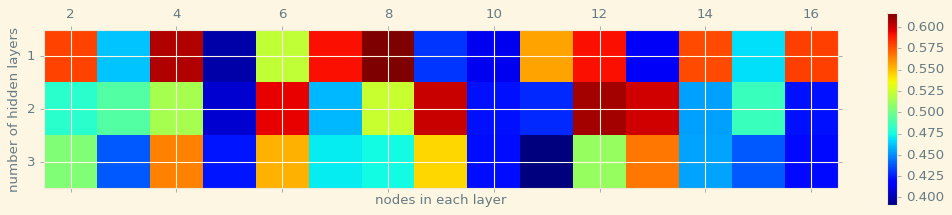

In [66]:
f, ax = plt.subplots(1, 1, figsize=(16, 3))
cax1 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(cax1)
ax.set_xticklabels(['']+list(nnodes))
ax.set_yticklabels(['']+list(nlayers))
ax.set_xlabel("nodes in each layer")
ax.set_ylabel("number of hidden layers")
# ax.set_title("Neural Networks Training AUC (rescaled)")
plt.show()

<ipython-input-69-ad1dfe3c2e09>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+list(nnodes))
<ipython-input-69-ad1dfe3c2e09>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(nlayers))


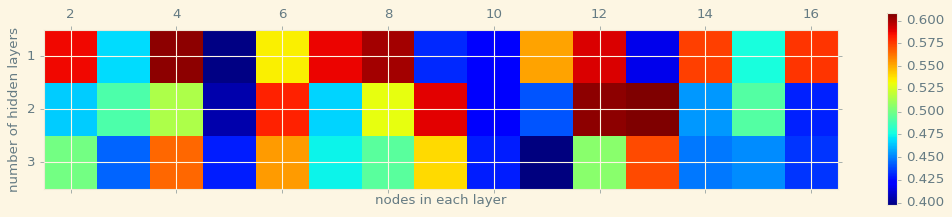

In [69]:
f, ax = plt.subplots(1, 1, figsize=(16, 3))
cax2 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(cax2)
ax.set_xticklabels(['']+list(nnodes))
ax.set_yticklabels(['']+list(nlayers))
ax.set_xlabel("nodes in each layer")
ax.set_ylabel("number of hidden layers")
# ax.set_title("Neural Networks validation AUC (rescaled)")
plt.show()

In [71]:
print('--------------------------')
print('    Training AUC          ')
print('--------------------------')
print(tr_auc)

print('--------------------------')
print('    Validation AUC        ')
print('--------------------------')
print(va_auc)

--------------------------
    Training AUC          
--------------------------
[[0.58019052 0.46274423 0.6062987  0.39976902 0.52231345 0.59193944
  0.61637208 0.43102761 0.4137587  0.55677815 0.59240525 0.41544555
  0.57770273 0.46881725 0.58103862]
 [0.48157143 0.49264829 0.51600699 0.40727585 0.59574786 0.46013071
  0.52481219 0.6021984  0.42342913 0.4288331  0.60929275 0.60052251
  0.45444016 0.48565725 0.42290046]
 [0.50546065 0.43900492 0.56502492 0.42442521 0.55379214 0.47150529
  0.47506155 0.54454788 0.42191198 0.39102915 0.51162028 0.5678227
  0.45612965 0.43891037 0.42161957]]
--------------------------
    Validation AUC        
--------------------------
[[0.58734268 0.4691864  0.60550238 0.39783261 0.53504663 0.58763045
  0.60149168 0.4321525  0.42236659 0.55230695 0.5910689  0.41705257
  0.57451469 0.47775508 0.57681961]
 [0.46580592 0.49098413 0.51563419 0.40579273 0.58108816 0.46765785
  0.52977385 0.58966878 0.42081404 0.44126993 0.60516241 0.60809592
  0.45503357 0

These results are interesting.

We can see from the validation AUC heat map in the second graph, that the dark red areas of the graph show up in a few regions: 1 layer/4 nodes, 1 layer/8 nodes, 2 layers/12 nodes, and 2 layers/ 13 nodes.

If we cross-reference this to the training AUC rates in the first graph, we see that in the 1 layer ones, those AUC rates are also really high.  This might be a model that is tending towards over fitting.

Therefore, I might choose the 2 layers/12 nodes configuration.  It actually performs slightly better on the validation than it does on the testing, which I think is a little strange.

Based on the results and analysis above, I recommend that the number of hidden layers should be equal to 2, and the nodes in each layer to be equal to 12.

### 2. Compare the performance of this activation function with logistic and htangent, in terms of the training and validation performance.

In [93]:
# define Gaussian as the activation function
def sig(z): return np.atleast_2d(np.exp(-z**2/2))
def dsig(z): return np.atleast_2d(-z*np.exp(-z**2/2))

In [98]:
methods = ['logistic' , 'htangent', 'Gaussian']
for i,m in enumerate(methods):
    nn = ml.nnet.nnetClassify()
    nn.init_weights([Xt.shape[1], 5, 2], 'random', XtS, Yt)
    if m == 'Gaussian':
        nn.setActivation('custom', sig, dsig)
    else:
        nn.setActivation(m)
    nn.train(XtS, Yt, stopTol=1e-8, stepConstant=.25, stopIter=100)
    print("{0:>15}: {1:.4f}".format(m+' Train AUC',nn.auc(XtS, Yt)))
    print("{0:>15}: {1:.4f}".format(m+' Validation AUC', nn.auc(XvS, Yva)))

it 2 : Jsur = 0.4984596288911941, J01 = 0.3468
it 4 : Jsur = 0.4981291737002375, J01 = 0.3468
it 8 : Jsur = 0.49818742689943685, J01 = 0.3468
it 16 : Jsur = 0.498041621421612, J01 = 0.3468
it 32 : Jsur = 0.4978241794015427, J01 = 0.3468
it 64 : Jsur = 0.4976236022568959, J01 = 0.3468
it 128 : Jsur = 0.49755172022994154, J01 = 0.3468
logistic Train AUC: 0.4688
logistic Validation AUC: 0.4761
it 2 : Jsur = 0.5013768899957355, J01 = 0.6532
it 4 : Jsur = 0.5013130318514549, J01 = 0.6532
it 8 : Jsur = 0.5014959028770509, J01 = 0.6532
it 16 : Jsur = 0.5012695668819895, J01 = 0.6532
it 32 : Jsur = 0.5011722896979071, J01 = 0.6532
it 64 : Jsur = 0.5010501113127565, J01 = 0.6532
it 128 : Jsur = 0.5009328189467019, J01 = 0.6532
htangent Train AUC: 0.5632
htangent Validation AUC: 0.5602


NameError: name 'd_sig' is not defined

Please note: Although I tried for a very long time to debug this nnetClassify function to pass in our custom function, I cannot get it to work.  Via Professor Fox's Piazza post, he said we don't have to edit the code.  I also tried posting on Piazza to get advice on how to debug.  So, the below analysis is for the only two functions that did work.

As we can see from the output, the `htangent` activation function has the highest training as well as validation for AUC.

I'm not too surprised by this, given that the range of `htangent` lends itself well to binary classification, as is the case with this dogs vs. cats dataset task.

### 3. Pick the classifier that you think will perform best, mention all of its hyper-parameter values, and explain the reason for your choice. Train it on as much data as you can, preferably all of X, submit the predictions on Xtest to Kaggle, and include your Kaggle username and leaderboard AUC in the report.

I think that the Neural Network will perform best for this task, because Neural Networks are good for image classification, and binary image classification is a relatively straightforward problem in the scope of Neural networks. I think that a linear regression approach is too simplistic for this application.  Image classification seems like a strange application for decision trees.  So, lets try Neural Networks.

#### Hyperparameters:
I will use the same hyperparameters from the above two problems:
- Hidden layers = 2
- Nodes in each layer = 12

Although the instructions recommend training on a higher amount of data than 5,000, my machine has limited computing power.  I'm using 5,000 for this assignment, so my code is just the same as the above problem #4.


Kaggle Submission information: As noted by a fellow classmate in the Piazza post(https://piazza.com/class/kjdij09z7wx52d?cid=141), we cannot push our scores to the leaderboard as specified in the instructions.  Additionally, the Ysubmit file was way too large to include here.  So, I have listed my score instead: 0.50142



# Statement of Collaboration

I had a discussion with my teammates on February 22 helping them debug an issue with graph output.  We did not share code but did show each other our graph output to help one of our groupmates diagnose a bug in his code.

I also discussed with my teammates about how long it took for us to each generate our graphs.  I confirmed with my teammates that this was a big issue, and one of my other teammates actually was not able to run 2.3 as well.

I abided by the academic integrity standards for UC Irvine.

### Acknowledgement of Sources
These sources were used to understand the theoretical context of some of the questions.  Including them for my own future reference, as well as for full transparency within the context of academic integrity.

https://stats.stackexchange.com/questions/287425/why-do-you-need-to-scale-data-in-knn

Hal Daumé III, A Course in Machine Learning
- Chapter 3, KNN and Geometry
- Chapter 5, Practical Issues (Rescaling and Normalization)